In [16]:
import numpy as np
from skimage import io, filters
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
import matplotlib.patches as patches

In [18]:
from skimage import exposure

In [19]:
fname = '../data/JH_1.png'

In [20]:
image = io.imread(fname)

In [21]:
type(image)

numpy.ndarray

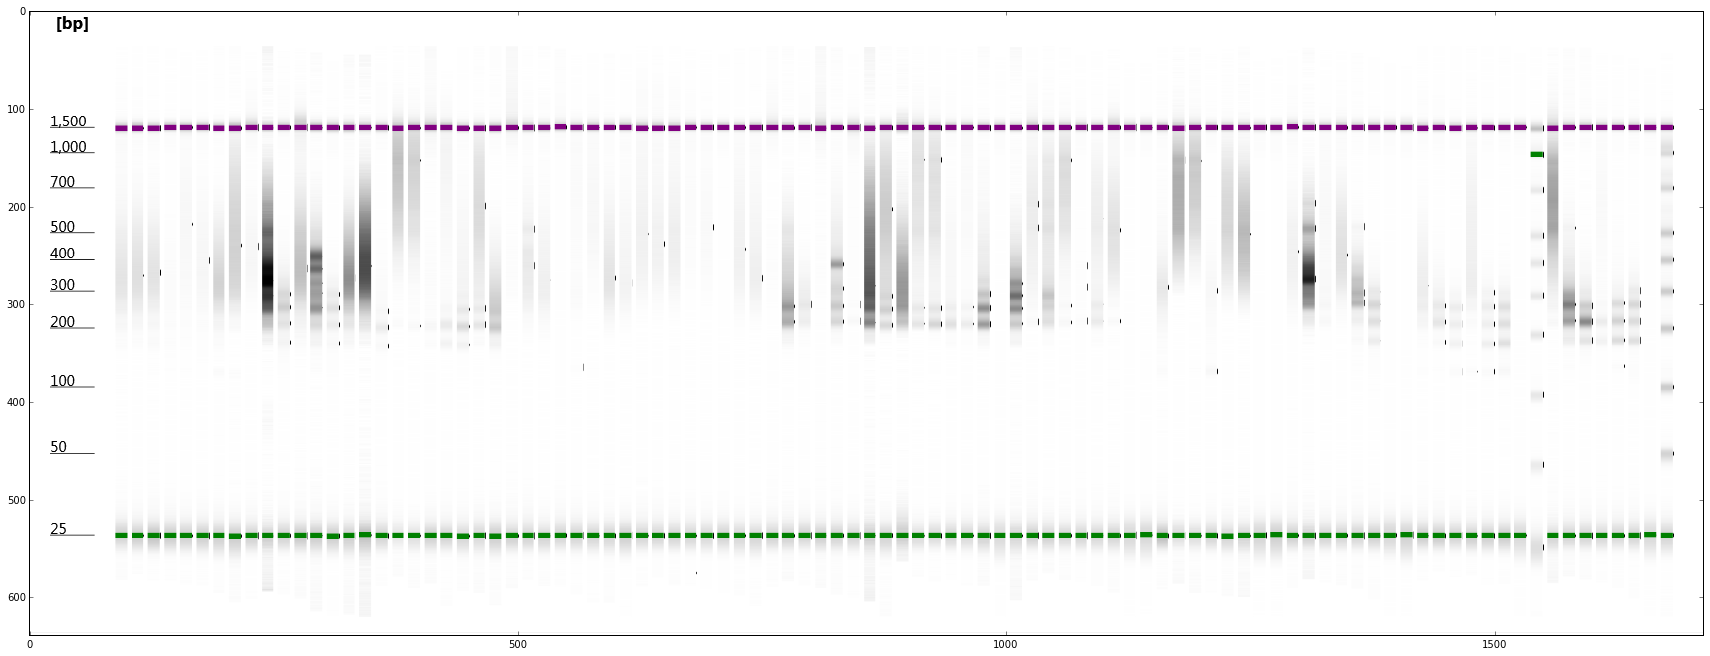

In [22]:
plt.figure(figsize=(30, 30))
io.imshow(image)

In [23]:
def iter_channels(image):
    for channel in np.rollaxis(image, axis=-1):
        yield channel

In [24]:
image = io.imread(fname)
maskR = image[:, :, 0] > 10
maskG = image[:, :, 1] < 10
maskB = image[:, :, 3] > 10

In [331]:
image = io.imread(fname)
maskR = image[:, :, 0] < 10
maskG = image[:, :, 1] > 10
maskB = image[:, :, 3] > 10

In [8]:
image[~maskR] = 0
image[~maskG] = 0
image[~maskB] = 0

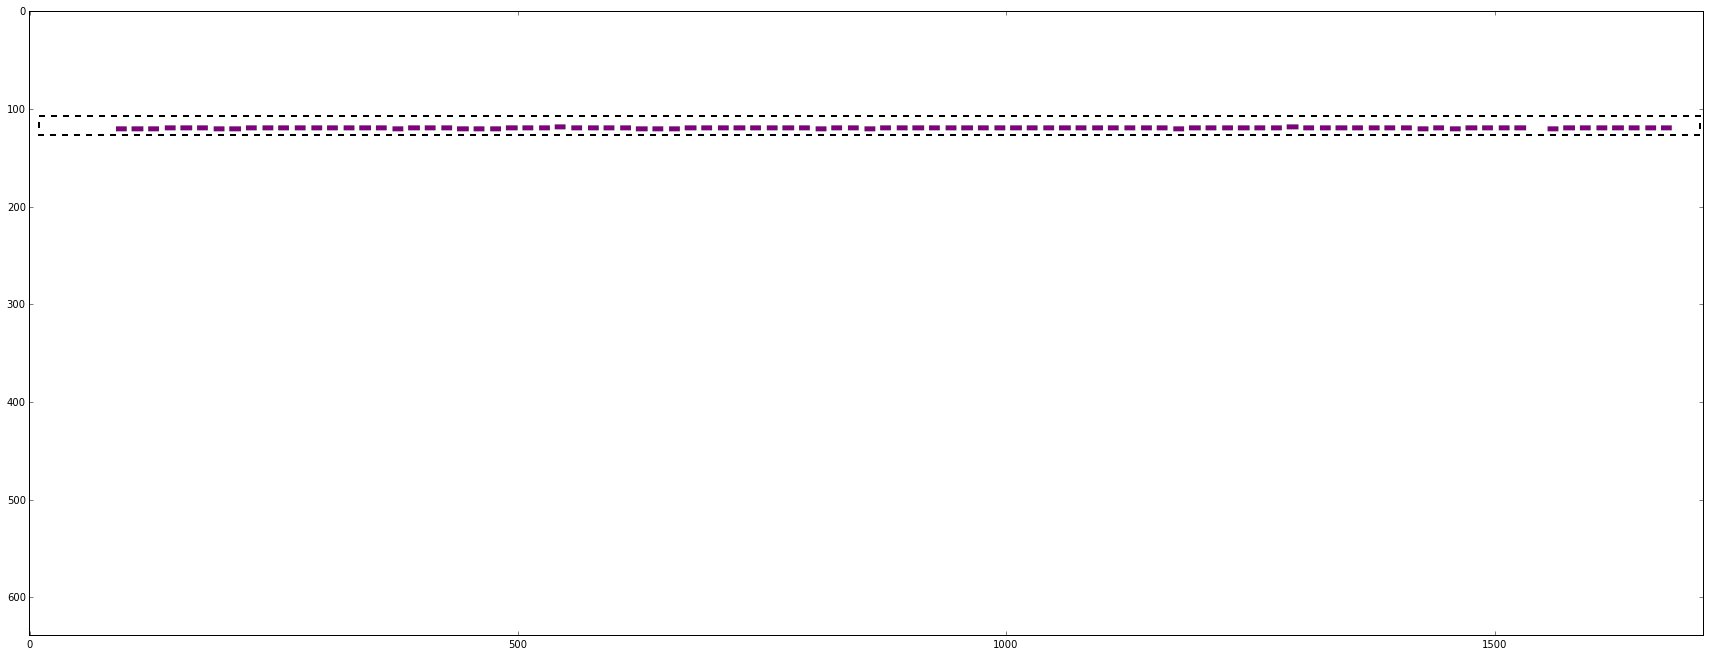

In [336]:
plt.figure(figsize=(30, 30))
plt.imshow(image)
ax = plt.gca()
ax.add_patch(patches.Rectangle((10, 107), 1700, 20, facecolor='none', lw=2, ls='dashed'))

In [9]:
top = np.nonzero(image[:, :, 0].sum(axis=1))[0][0]

In [348]:
top

117

In [10]:
wells = np.nonzero(image[:, :, 0].sum(axis=0))[0]

In [11]:
def consecutive(data, stepsize=1):
    """ http://stackoverflow.com/questions/7352684/how-to-find-the-groups-of-consecutive-elements-from-an-array-in-numpy """
    return np.split(data, np.where(np.diff(data) != stepsize)[0]+1)

In [12]:
bob2 = consecutive(wells)

In [13]:
bob2

[array([89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]),
 array([105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116]),
 array([122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]),
 array([139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149]),
 array([155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166]),
 array([172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182]),
 array([189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199]),
 array([205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216]),
 array([222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232]),
 array([239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249]),
 array([255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 265]),
 array([272, 273, 274, 275, 276, 277, 278, 279, 280, 281, 282]),
 array([289, 290, 291, 292, 293, 294, 295, 296, 297, 298, 299]),
 array([305, 306, 307, 308, 309, 310, 311, 312, 313, 314, 315]),
 array([322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332]),
 array([338, 339, 340

In [381]:
wellCoord = list()
for well in bob2:
    midpoint = int(np.ceil((well[-1] - well[0]) / 2) + well[0])
    wellCoord.append((well[0], well[-1], midpoint))

In [382]:
wellCoord

[(89, 99, 94),
 (105, 116, 111),
 (122, 132, 127),
 (139, 149, 144),
 (155, 166, 161),
 (172, 182, 177),
 (189, 199, 194),
 (205, 216, 211),
 (222, 232, 227),
 (239, 249, 244),
 (255, 265, 260),
 (272, 282, 277),
 (289, 299, 294),
 (305, 315, 310),
 (322, 332, 327),
 (338, 349, 344),
 (355, 365, 360),
 (372, 382, 377),
 (388, 399, 394),
 (405, 415, 410),
 (422, 432, 427),
 (438, 449, 444),
 (455, 465, 460),
 (472, 482, 477),
 (488, 499, 494),
 (505, 515, 510),
 (522, 532, 527),
 (538, 548, 543),
 (555, 565, 560),
 (572, 582, 577),
 (588, 598, 593),
 (605, 615, 610),
 (621, 632, 627),
 (638, 648, 643),
 (655, 665, 660),
 (671, 682, 677),
 (688, 698, 693),
 (705, 715, 710),
 (721, 732, 727),
 (738, 748, 743),
 (755, 765, 760),
 (771, 782, 777),
 (788, 798, 793),
 (805, 815, 810),
 (821, 831, 826),
 (838, 848, 843),
 (855, 865, 860),
 (871, 881, 876),
 (888, 898, 893),
 (904, 915, 910),
 (921, 931, 926),
 (938, 948, 943),
 (954, 965, 960),
 (971, 981, 976),
 (988, 998, 993),
 (1004, 1015,

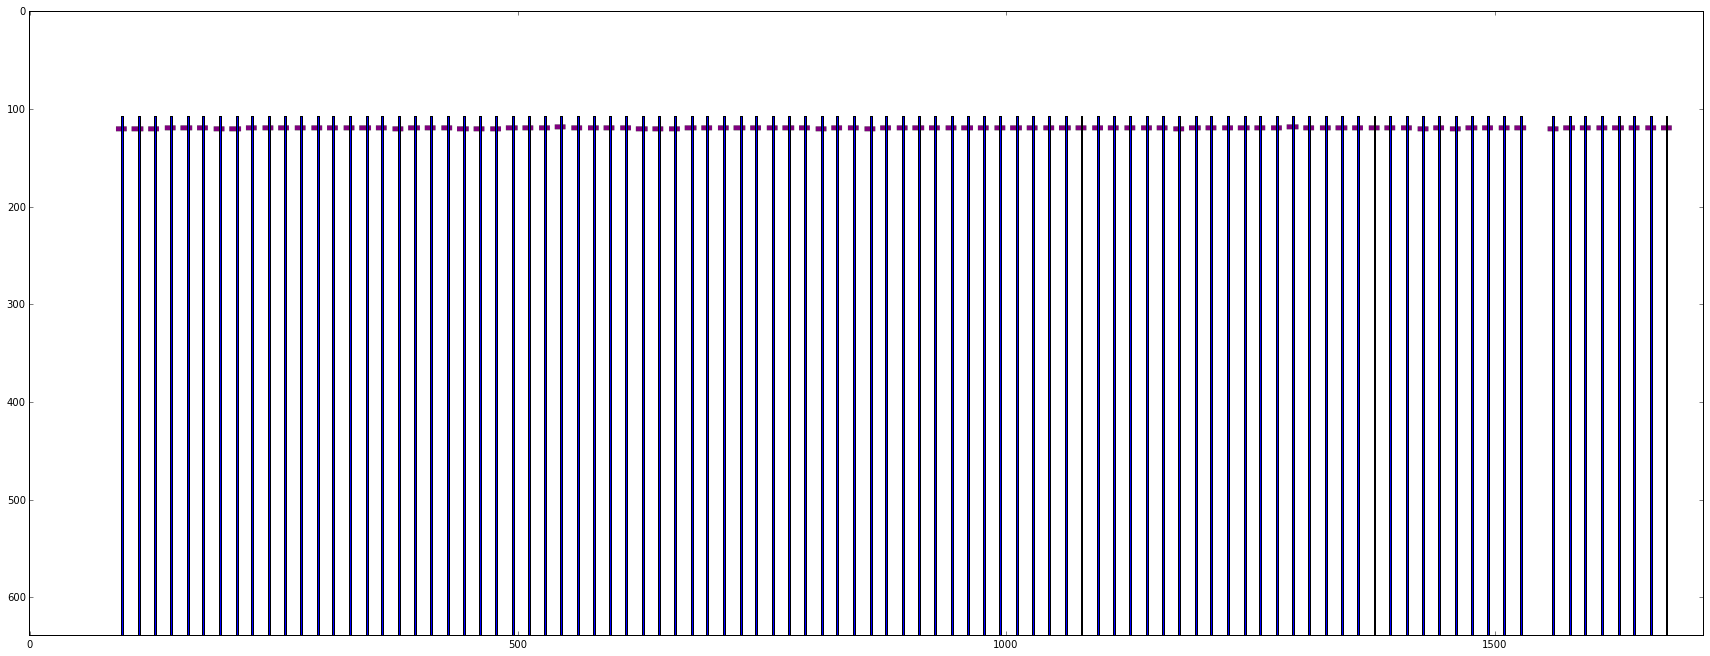

In [384]:
plt.figure(figsize=(30, 30))
plt.imshow(image)
ax = plt.gca()

for start, end, mid in wellCoord:
    ax.add_patch(patches.Rectangle((mid, 107), 2, 600))